# SPO2IDA

The aim of this procedure is the estimation of the median spectral acceleration value that brings the structure to the attainment of a set of damage states ds, and the corresponding dispersion. The aim is achieved making use of the tool SPO2IDA (Vamvatsikos and Cornell, 2006), where static pushover curves are converted into 16%, 50% and 84% ida curves, using empirical relationships from a large database of incremental dynamic analysis results, as shown in the figure below.

<img src="../../../../../figures/spo2ida.jpg" width="500" align="middle">

**Note**: To run the code in a cell:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

In [4]:
from rmtk.vulnerability.derivation_fragility.R_mu_T_dispersion.SPO2IDA import SPO2IDA_procedure 
from rmtk.vulnerability.common import utils
%matplotlib inline 

---
###Load pushover curves

In order to use this methodology, it is necessary to provide one (or a group) of pushover curves, defined according to the format described in the [RMTK manual](../../../../../rmtk-docs.pdf). The user needs to provide the following information in the cell below:
- The location of the folder containing the pushover curves using the parameter `capacity_curves_file`.
- The type of information provided in the input using the parameter `input_type`. The user can provide either base shear and top displacement or base shear and displacement of each storey.
- A spectral shape using the parameter `input_spectrum` in case multiple pushover curves are input.

In [5]:
capacity_curves_file = '../../../../../../rmtk_data/capacity_curves_Vb-dfloor.csv'
input_type = 'Vb-dfloor'
input_spectrum = '../../../../../../rmtk_data/FEMAP965spectrum.txt'

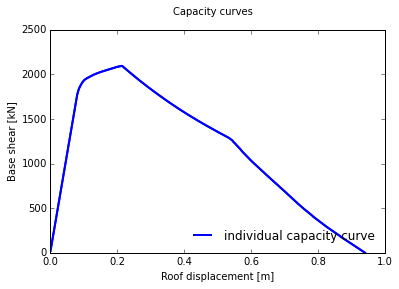

In [6]:
capacity_curves = utils.read_capacity_curves(capacity_curves_file)
utils.plot_capacity_curves(capacity_curves)
Sa_ratios = utils.get_spectral_ratios(capacity_curves,input_spectrum)

###Idealise pushover curves

In order to use this methodology the pushover curves need to be idealised. Please choose an idealised shape (either bilinear or quadrilinear) using the parameter `idealised_type`. Idealised curves can be directly provided as input setting the field 'Idealised' to TRUE in the input_file.

In [7]:
idealised_type = 'bilinear'

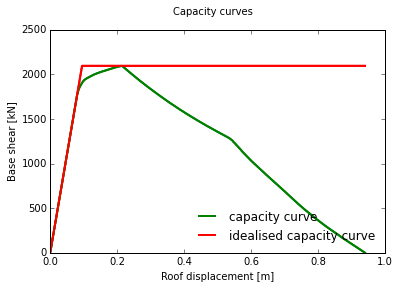

In [8]:
idealised_capacity = utils.idealisation(idealised_type, capacity_curves)
utils.plot_idealised_capacity(idealised_capacity, capacity_curves, idealised_type)

###Load damage state thresholds

Please define in the variable `damage_state_file` the path to your damage model.

In [9]:
damage_model_file = '../../../../../../rmtk_data/damage_model_ISD.csv'

In [10]:
damage_model = utils.read_damage_model(damage_model_file)
print damage_model

{'damage_states': ['Slight', 'Moderate', 'Extensive', 'Collapse'], 'cov': [], 'type_criteria': 'interstorey drift', 'type_damage_state': [], 'distribution': ['normal', 'normal', 'normal', 'normal'], 'mean': []}


###Calculate fragility functions

The damage threshold dispersion is calculated and integrated with the record-to-record dispersion making use of Monte Carlo simulations. Please enter the number of Monte Carlo simulations that want to be performed in the variables `montecarlo_samples`.
Decide to display IDA curves derived with the SPO2IDA tool, setting the variables `ida_plotflag` to 1 (display) or 0 (do not display).

In [11]:
montecarlo_samples = 25
ida_plotflag = 1

In [12]:
fragility_model = SPO2IDA_procedure.calculate_fragility(capacity_curves, idealised_capacity, damage_model, montecarlo_samples, Sa_ratios, ida_plotflag)

KeyError: 'median'

### Save fragility functions

The parameter `output_type` controls the choice of fragility function parameters that will be saved to disk. The three choices for this parameter are "median-dispersion", "logmean-cov", and "mean-sigma". Setting the parameter `save` to 1 will save the generated fragility functions to disk.

In [ ]:
output_type = 'mean-sigma'
save = 1

In [ ]:
utils.plot_fragility_model(fragility_model, 0.01, 2, save)
utils.create_fragility_out_files(fragility_model, output_type, save)